In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 172MB/s]
100% 1.06G/1.06G [00:04<00:00, 257MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip.extractall('/content/')
zip.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dropout
import cv2

array([[[113, 133, 128],
        [120, 140, 135],
        [118, 135, 131],
        ...,
        [ 64,  51,  35],
        [ 62,  52,  35],
        [ 62,  52,  35]],

       [[118, 135, 131],
        [121, 138, 134],
        [112, 129, 125],
        ...,
        [ 69,  56,  40],
        [ 67,  57,  40],
        [ 67,  57,  40]],

       [[115, 131, 124],
        [118, 134, 127],
        [109, 125, 118],
        ...,
        [ 70,  57,  41],
        [ 68,  58,  41],
        [ 67,  57,  40]],

       ...,

       [[ 40,  30,  13],
        [ 48,  38,  21],
        [ 66,  56,  39],
        ...,
        [ 42,  34,  27],
        [ 41,  35,  28],
        [ 43,  37,  30]],

       [[ 63,  53,  36],
        [ 80,  70,  53],
        [ 89,  79,  62],
        ...,
        [ 41,  35,  28],
        [ 40,  37,  29],
        [ 42,  39,  31]],

       [[ 68,  58,  41],
        [ 82,  72,  55],
        [ 85,  75,  58],
        ...,
        [ 38,  32,  27],
        [ 38,  35,  30],
        [ 42,  39,  34]]], dtype=uint8)
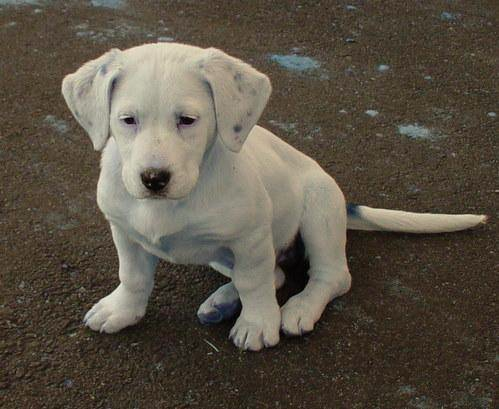

In [5]:
image = cv2.imread('/content/test/dogs/dog.10176.jpg')
image

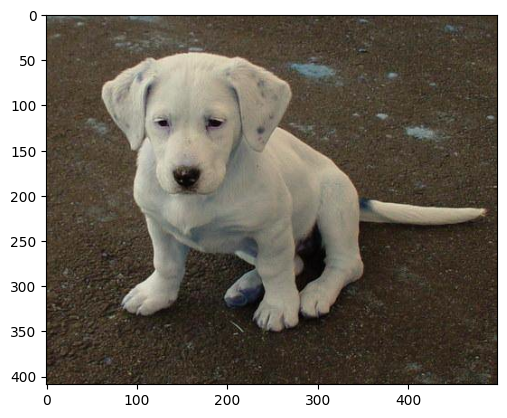

In [6]:
plt.imshow(image)

In [7]:
image.shape

(409, 499, 3)

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(
            directory='/content/train',
            labels = 'inferred',
            label_mode='int',
            batch_size = 32,
            image_size = (256,256)
        )

test_data = tf.keras.utils.image_dataset_from_directory(
            directory = '/content/test',
            labels = 'inferred',
            label_mode = 'int',
            batch_size = 32,
            image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def scale_down(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [10]:
train_data = train_data.map(scale_down)
test_data = test_data.map(scale_down)

In [11]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
image/255

array([[[0.44313725, 0.52156863, 0.50196078],
        [0.47058824, 0.54901961, 0.52941176],
        [0.4627451 , 0.52941176, 0.51372549],
        ...,
        [0.25098039, 0.2       , 0.1372549 ],
        [0.24313725, 0.20392157, 0.1372549 ],
        [0.24313725, 0.20392157, 0.1372549 ]],

       [[0.4627451 , 0.52941176, 0.51372549],
        [0.4745098 , 0.54117647, 0.5254902 ],
        [0.43921569, 0.50588235, 0.49019608],
        ...,
        [0.27058824, 0.21960784, 0.15686275],
        [0.2627451 , 0.22352941, 0.15686275],
        [0.2627451 , 0.22352941, 0.15686275]],

       [[0.45098039, 0.51372549, 0.48627451],
        [0.4627451 , 0.5254902 , 0.49803922],
        [0.42745098, 0.49019608, 0.4627451 ],
        ...,
        [0.2745098 , 0.22352941, 0.16078431],
        [0.26666667, 0.22745098, 0.16078431],
        [0.2627451 , 0.22352941, 0.15686275]],

       ...,

       [[0.15686275, 0.11764706, 0.05098039],
        [0.18823529, 0.14901961, 0.08235294],
        [0.25882353, 0

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid',activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [18]:
his = model.fit(train_data, validation_data=test_data, epochs = 10, batch_size = 625)

Epoch 1/10
625/625 [==============================] - 60s 84ms/step - loss: 0.6087 - accuracy: 0.6662 - val_loss: 0.5220 - val_accuracy: 0.7334
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.4818 - accuracy: 0.7669 - val_loss: 0.4536 - val_accuracy: 0.7906
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3705 - accuracy: 0.8327 - val_loss: 0.4747 - val_accuracy: 0.7968
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2552 - accuracy: 0.8926 - val_loss: 0.6853 - val_accuracy: 0.7830
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1383 - accuracy: 0.9466 - val_loss: 0.9440 - val_accuracy: 0.7732
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0812 - accuracy: 0.9719 - val_loss: 1.0876 - val_accuracy: 0.7766
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0683 - accuracy: 0.9750 - val_loss: 0.8293 - val_accuracy:

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [22]:
his = model.fit(train_data,  validation_data = test_data, epochs=10)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.5819 - accuracy: 0.5878 - val_loss: 0.6155 - val_accuracy: 0.6558
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5934 - accuracy: 0.6912 - val_loss: 0.5476 - val_accuracy: 0.7246
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5020 - accuracy: 0.7577 - val_loss: 0.5210 - val_accuracy: 0.7282
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5187 - accuracy: 0.7600 - val_loss: 0.4954 - val_accuracy: 0.7516
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4260 - accuracy: 0.8042 - val_loss: 0.5630 - val_accuracy: 0.6876
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3655 - accuracy: 0.8362 - val_loss: 0.4571 - val_accuracy: 0.7850
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2960 - accuracy: 0.8730 - val_loss: 0.4788 - val_ac

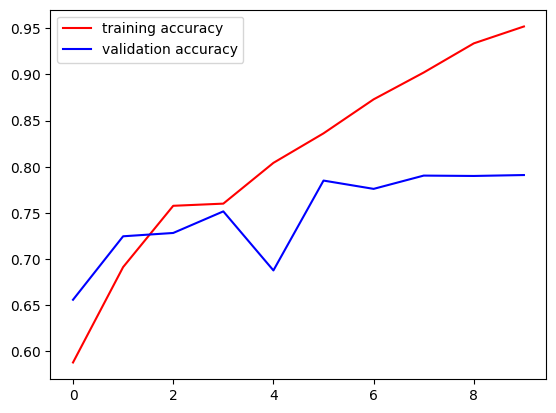

In [23]:
plt.plot(his.history['accuracy'], color='r', label='training accuracy')
plt.plot(his.history['val_accuracy'], color='b', label='validation accuracy')
plt.legend()
plt.show()

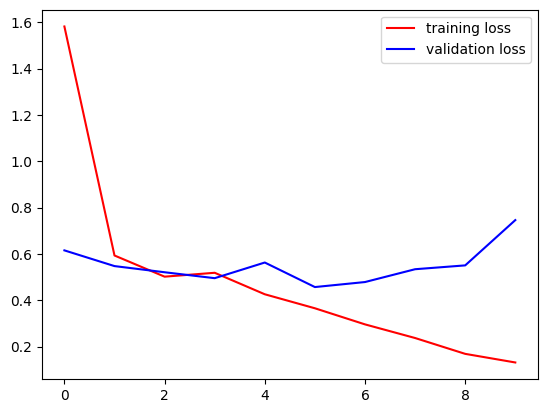

In [24]:
plt.plot(his.history['loss'], color='r', label='training loss')
plt.plot(his.history['val_loss'], color='b', label='validation loss')
plt.legend()
plt.show()

In [47]:
test_img = cv2.imread('/content/test/dogs/dog.1301.jpg')

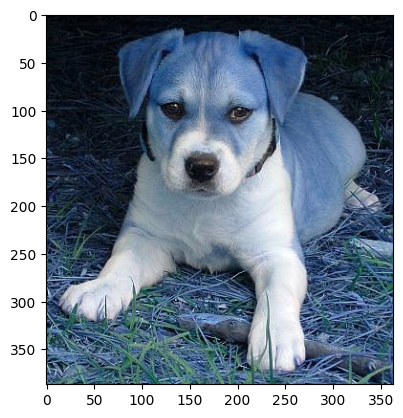

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(387, 363, 3)

In [50]:
test_img = cv2.resize(test_img, (256, 256))

In [51]:
test_img.shape

(256, 256, 3)

array([[[  0,   5,  10],
        [  0,   3,   8],
        [  0,   5,  10],
        ...,
        [  8,  14,  20],
        [  5,  11,  18],
        [  6,  12,  19]],

       [[  0,   5,  10],
        [  0,   3,   7],
        [  0,   2,   7],
        ...,
        [  1,   7,  14],
        [  2,   8,  15],
        [  5,  11,  18]],

       [[  5,  11,  16],
        [  3,   9,  14],
        [  2,   8,  12],
        ...,
        [ 10,  16,  23],
        [  7,  13,  20],
        [ 11,  17,  24]],

       ...,

       [[ 86, 119, 152],
        [ 67,  99, 133],
        [ 48,  79, 113],
        ...,
        [ 33,  62, 104],
        [ 35,  64, 109],
        [ 53,  85, 127]],

       [[100, 129, 159],
        [ 63,  93, 122],
        [ 45,  75, 103],
        ...,
        [ 13,  41,  75],
        [ 20,  52,  88],
        [ 54,  86, 121]],

       [[100, 128, 158],
        [ 93, 122, 150],
        [110, 140, 165],
        ...,
        [121, 152, 183],
        [ 37,  70, 103],
        [ 44,  77, 110]]], dtype=uint8)
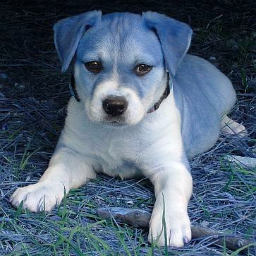

In [52]:
test_img

In [53]:
test_input = test_img.reshape(1, 256, 256, 3)
test_input

array([[[[  0,   5,  10],
         [  0,   3,   8],
         [  0,   5,  10],
         ...,
         [  8,  14,  20],
         [  5,  11,  18],
         [  6,  12,  19]],

        [[  0,   5,  10],
         [  0,   3,   7],
         [  0,   2,   7],
         ...,
         [  1,   7,  14],
         [  2,   8,  15],
         [  5,  11,  18]],

        [[  5,  11,  16],
         [  3,   9,  14],
         [  2,   8,  12],
         ...,
         [ 10,  16,  23],
         [  7,  13,  20],
         [ 11,  17,  24]],

        ...,

        [[ 86, 119, 152],
         [ 67,  99, 133],
         [ 48,  79, 113],
         ...,
         [ 33,  62, 104],
         [ 35,  64, 109],
         [ 53,  85, 127]],

        [[100, 129, 159],
         [ 63,  93, 122],
         [ 45,  75, 103],
         ...,
         [ 13,  41,  75],
         [ 20,  52,  88],
         [ 54,  86, 121]],

        [[100, 128, 158],
         [ 93, 122, 150],
         [110, 140, 165],
         ...,
         [121, 152, 183],
        

In [54]:
model.predict(test_input)
model.predict(test_input)[0]
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 23ms/step


1.0

In [55]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('This is a Cat')
else:
  print('This is a Dog')

1/1 [==============================] - 0s 27ms/step
Output is: 1.0 

This is a Dog


In [45]:
def test_image(img_source):

  test_img = cv2.imread(img_source)
  # print(test_img.shape)
  test_img = cv2.resize(test_img, (256, 256))
  # print(test_img.shape)
  plt.imshow(test_img)
  test_input = test_img.reshape(1, 256, 256, 3)

  output = model.predict(test_input)[0][0]
  print(f'Output is: {output} \n')

  if output < 0.5:
    print('This is a Cat')
  else:
    print('This is a Dog')

1/1 [==============================] - 0s 31ms/step
Output is: 1.0 

This is a Dog


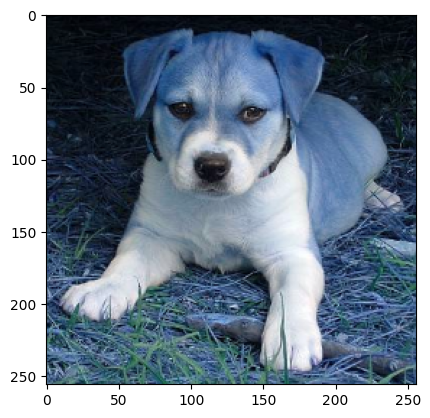

In [46]:
test_image('/content/test/dogs/dog.1301.jpg')